# Titanic Data Analysis

we have the data of titanic insident, we need to find out how many percentage of male and female are survive from that incident.

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic=pd.read_csv('titanic dataset.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Data Cleaning

In [7]:
titanic.describe().T #descriptive statistics our dataset

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
titanic.info() # all information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Our target to find only how many male and female are survived

we dont have name, ticket, fare and cabin lets delet the attribute

In [9]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [10]:
# for analysis we dont have name, ticket, fare and cabin columns lets delete.
del titanic['Name']
del titanic['Ticket']
del titanic['Fare']
del titanic['Cabin']

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [15]:
# convert male as 1 female as 0

def con(str):
    if str=='male':
        return 1
    else:
        return 0
titanic['Gender']=titanic['Sex'].apply(con)  

In [16]:
titanic.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,0


In [17]:
del titanic['Sex']

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [21]:
titanic.dtypes #check all columns datatypes 

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Embarked        object
Gender           int64
dtype: object

In [24]:
titanic.isnull().sum() #check null values

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [26]:
# calculate the average age of survived & not servived passenger.
meanS= titanic[titanic.Survived==1].Age.mean()
meanS1= titanic[titanic.Survived==0].Age.mean()
meanS,meanS1

(28.343689655172415, 30.62617924528302)

In [28]:
# Fill Age column null values using mean strategy
titanic.Age.fillna(meanS,inplace=True)
titanic.Age.fillna(meanS1,inplace=True)

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [32]:
titanic.isnull().sum() #remove null values in age columns.

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Embarked       2
Gender         0
dtype: int64

In [34]:
# check Embarked is affect to our target.

titanic[['Embarked','Survived']].value_counts()

Embarked  Survived
S         0           427
          1           217
C         1            93
          0            75
Q         0            47
          1            30
Name: count, dtype: int64

In [35]:
titanic.dropna(inplace=True)

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [43]:
# change embarked category value to numeric value s==1,c==2,q==3
def getemb(str):
    if str == 'S':
        return 1
    elif str =='C':
         return 2
    else:
        return 3
titanic['Embarked']=titanic['Embarked'].apply(getemb)

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,1,1
1,2,1,1,38.0,1,0,2,0
2,3,1,3,26.0,0,0,1,0
3,4,1,1,35.0,1,0,1,0
4,5,0,3,35.0,0,0,1,1


In [45]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Embarked         int64
Gender           int64
dtype: object

# Visualize Dataset

In [53]:
import matplotlib.pyplot as plt

In [48]:
#Count Total number of male & female from the data.
male = (titanic['Gender']==1).sum()
female = (titanic['Gender']==0).sum()
print('Male numbers:-',male)
print('Female numbers:-',female)

Male numbers:- 577
Female numbers:- 312


In [51]:
tp=[male,female]
tp

[577, 312]

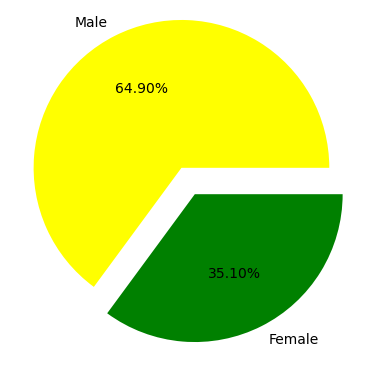

In [54]:
# Draw pie chart
plt.pie(tp,labels=["Male",'Female'],colors=['yellow','green'],explode=(0.2,0),autopct="%.2f%%")
plt.show()

In [56]:
# cheak total number of male suevive

maleS=((titanic['Gender']==1)&(titanic['Survived']==1)).sum()
maleNS=((titanic['Gender']==1)&(titanic['Survived']==0)).sum()
print(maleS,maleNS)

109 468


In [57]:
# cheak total number of female suevive

femaleS=((titanic['Gender']==0)&(titanic['Survived']==1)).sum()
femaleNS=((titanic['Gender']==0)&(titanic['Survived']==0)).sum()
print(femaleS,femaleNS)

231 81


In [59]:
chart=[maleS,maleNS,femaleS,femaleNS]
chart

[109, 468, 231, 81]

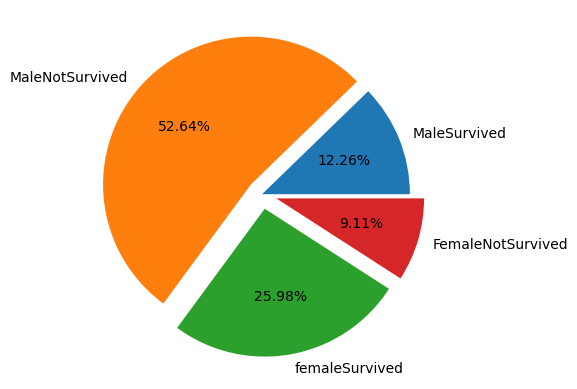

In [63]:
#plot piechart
plt.pie(chart,autopct="%.2f%%",explode=(0,0.1,0.1,0.1),labels=['MaleSurvived','MaleNotSurvived','femaleSurvived','FemaleNotSurvived'])
plt.show()       

# At the end we conclude that from all the passenger travel in the taitanic.